In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
#read train.csv into pd.dataframe
train = pd.read_csv("../input/digit-recognizer/train.csv")
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold

#extract images from train into dataframe
x_train = train.drop(["label"],axis = 1) #drop: remove column/ row
y_train = train["label"]

#read testing data
x_test = pd.read_csv("../input/digit-recognizer/test.csv")

#folding testing data
kf = KFold(n_splits = 4, 
           shuffle = True,
          random_state = 123)
#get training and validating index
train_index, test_index = list(kf.split(x_train))[0]

#get training images and validating images and correct ans
tr_x, va_x = x_train.iloc[train_index], x_train.iloc[test_index]
tr_y, va_y = y_train.iloc[train_index], y_train.iloc[test_index]

#divided by 255
tr_x, va_x = np.array(tr_x/255.0), np.array(va_x/255.0)

#one hot encoding
tr_y = to_categorical(tr_y, 10) #np.ndarray object
va_y = to_categorical(va_y, 10) #np.ndarray object

#output
print(tr_x.shape)
print(va_x.shape)
print(tr_y.shape)
print(va_y.shape)

(31500, 784)
(10500, 784)
(31500, 10)
(10500, 10)


In [4]:
#count number of images
from collections import Counter
count = Counter(train["label"])
count

Counter({1: 4684,
         0: 4132,
         4: 4072,
         7: 4401,
         3: 4351,
         5: 3795,
         8: 4063,
         9: 4188,
         2: 4177,
         6: 4137})

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

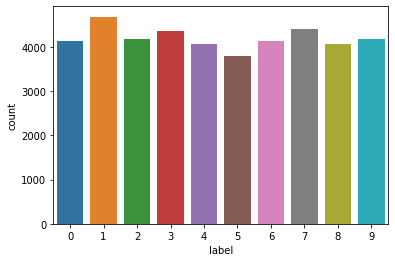

In [5]:
import seaborn as sns
sns.countplot(train["label"])

In [6]:
print(tr_x[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

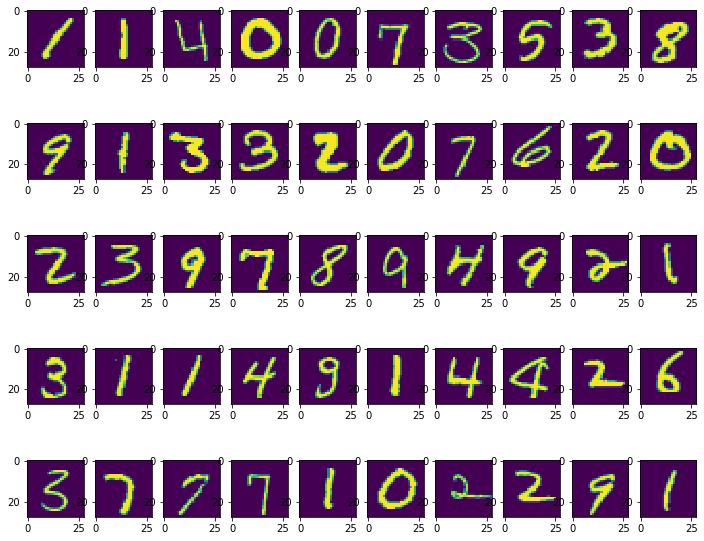

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

#take first 50 images
plt.figure(figsize = (12, 10))
x, y = 10, 5 #6 by 10 dimension

for i in range(50):
    plt.subplot(y, x, i+1)
    plt.imshow(tr_x[i].reshape((28,28)), interpolation = "nearest")
plt.show()

In [8]:
def sigmoid(x):
    return  1/(1+np.exp(-x))

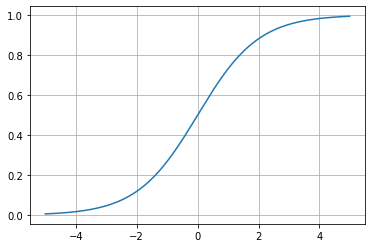

In [9]:
x = np.arange(-5.0,5.0,0.01) #set array from -5.0 to 5.0, diff 0.01
y = sigmoid(x) #exe s
plt.plot(x,y) #(x value in x axis, y value in y axis)
plt.grid(True) #show grid
plt.show()

In [10]:
#establish Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

#define "Sequential" object
model = Sequential()

#add hidden layer
model.add(Dense(128, #no. of neuron 
               input_dim = tr_x.shape[1], #input data's dimension
                activation = 'sigmoid'))
#add output layer
model.add(Dense(10,
              activation = 'softmax'))

#generate
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ["accuracy"])

#show the structure of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


2022-05-10 14:42:46.887844: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [11]:
#train the model 
result = model.fit(tr_x, tr_y, #train and test data
                  epochs = 5, #train times
                  batch_size = 100, #size of each batch
                  validation_data = (va_x, va_y), #set validation data
                  verbose = 1) #outpur result

2022-05-10 14:42:47.191168: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
315/315 [==============================] - 2s 3ms/step - loss: 0.7339 - accuracy: 0.8327 - val_loss: 0.3842 - val_accuracy: 0.8999
Epoch 2/5
315/315 [==============================] - 1s 3ms/step - loss: 0.3269 - accuracy: 0.9101 - val_loss: 0.2940 - val_accuracy: 0.9181
Epoch 3/5
315/315 [==============================] - 1s 3ms/step - loss: 0.2627 - accuracy: 0.9260 - val_loss: 0.2535 - val_accuracy: 0.9251
Epoch 4/5
315/315 [==============================] - 1s 3ms/step - loss: 0.2259 - accuracy: 0.9367 - val_loss: 0.2219 - val_accuracy: 0.9365
Epoch 5/5
315/315 [==============================] - 1s 3ms/step - loss: 0.1970 - accuracy: 0.9445 - val_loss: 0.2058 - val_accuracy: 0.9396


In [12]:
#use test data to predict
result = model.predict(x_test)

#output first 5 predict result
print(result[:5])

#output max index (predicted number)
print([x.argmax() for x in result[:5]])
y_test = [x.argmax() for x in result]


[[1.5342821e-04 5.4086746e-07 9.9912518e-01 6.5787736e-04 1.0892240e-06
  2.4088033e-05 4.3756258e-06 9.1365009e-06 2.3629293e-05 6.7730275e-07]
 [9.9942940e-01 7.7413993e-08 1.1753816e-04 2.0597854e-05 3.1629639e-08
  4.0206753e-04 4.2026891e-06 5.2725595e-06 1.6662603e-05 4.0739451e-06]
 [4.2428503e-08 1.2861281e-05 3.8557449e-05 1.4320257e-04 3.5384536e-02
  1.2179494e-04 1.7617963e-06 2.0219130e-05 6.5116733e-03 9.5776534e-01]
 [1.2153737e-02 8.2231585e-05 4.0897873e-01 1.2516674e-05 1.8277182e-01
  5.9998049e-05 1.9095435e-03 3.2926925e-02 8.2572196e-03 3.5284719e-01]
 [4.4527489e-05 6.9251560e-05 7.6703560e-03 9.9163669e-01 3.0665637e-07
  1.3070830e-04 3.0308231e-05 2.4048697e-05 3.9225825e-04 1.5611304e-06]]
[2, 0, 9, 2, 3]


In [13]:
submit_df = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')

#output first 5 result
submit_df.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [14]:
submit_df['Label'] = y_test

submit_df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,2
4,5,3


In [15]:
submit_df.to_csv('submission.csv', index = False)